Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE #to handle imbalanced class distribution
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV #less time for hyperparam
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

Data loading and analysis

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(800, 22)

In [5]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [7]:
#convert age column to int roundinf i
df['age'] = df['age'].astype(int)

In [8]:
df.head(1)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0


In [9]:
#dropping id and age desc
df.drop(columns=['ID', 'age_desc'], inplace=True)

In [10]:
df.shape

(800, 20)

In [11]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [12]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [13]:
#define thw mapping dict for country names
contry_of_res = {
    'Viet Nam': 'Vietnam',
    'American': 'US',
    'Hong Kong': 'China'

}

#replace value in country column
df['contry_of_res'] = df['contry_of_res'].replace(contry_of_res)

In [14]:
#target class distribution
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


EDA

In [15]:
print(df.shape)
df.head()

(800, 20)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [16]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Univariate Analysis

numerical columns :
1. age
2. result

In [17]:
#set the desired theme
sns.set_theme(style='darkgrid')

Mean age:  27.96375
Median age:  24.0


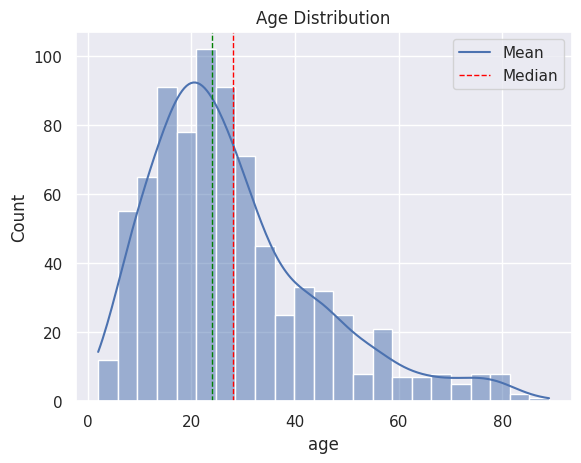

Mean result:  8.537303106501248
Median result:  9.605299308


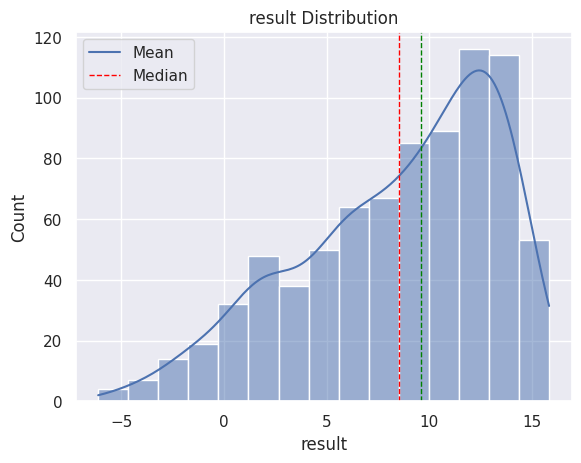

In [18]:
#distribution plots

sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')
age_mean = df['age'].mean()
age_median = df['age'].median()
print('Mean age: ', age_mean)
print('Median age: ', age_median)

#add vertical lines for mean and median
plt.axvline(age_mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(age_median, color='green', linestyle='dashed', linewidth=1)

plt.legend(['Mean', 'Median'])

plt.show()


sns.histplot(df['result'],kde=True)
plt.title('result Distribution')
result_mean = df['result'].mean()
result_median = df['result'].median()
print('Mean result: ', result_mean)
print('Median result: ', result_median)

plt.axvline(result_mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(result_median, color='green', linestyle='dashed', linewidth=1)

plt.legend(['Mean', 'Median'])

plt.show()

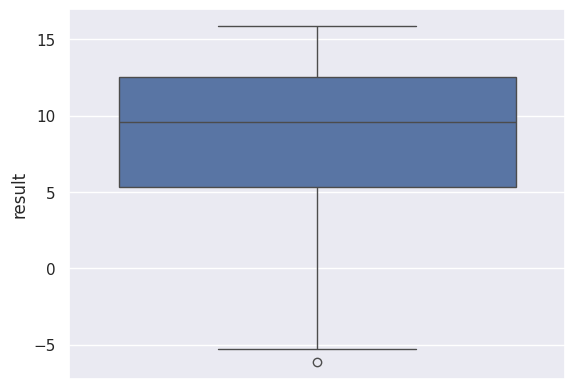

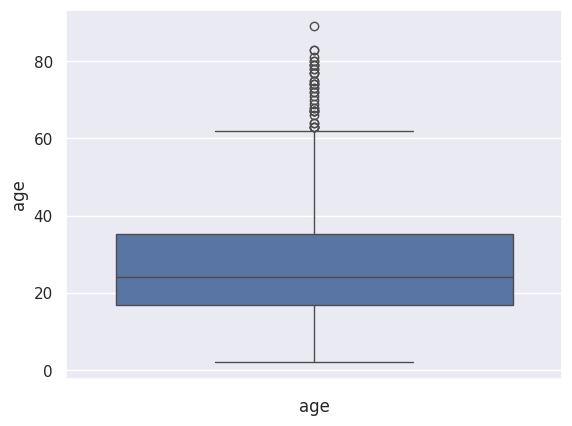

In [19]:
#box plot to identify outliers
sns.boxplot(df['result'])
plt.show()

sns.boxplot(df['age'])
plt.xlabel('age')
plt.show()

In [20]:
#count the outlier
q1 = df['result'].quantile(0.25)
q3 = df['result'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
result_outliers = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [21]:
len(result_outliers)

1

In [22]:
#count the outlier
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
age_outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

In [23]:
len(age_outliers)

39

Univariate Analysis


Categorical Columns

In [24]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

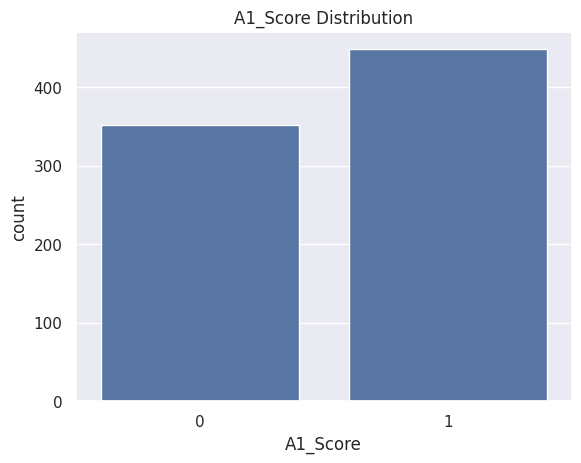

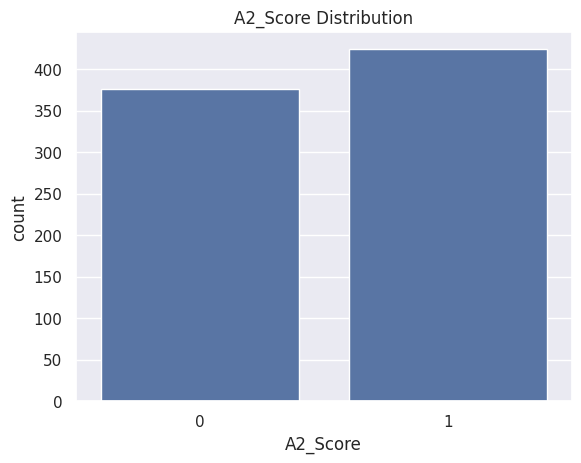

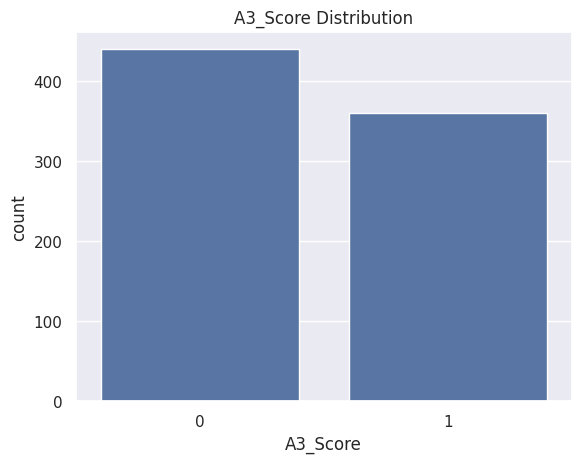

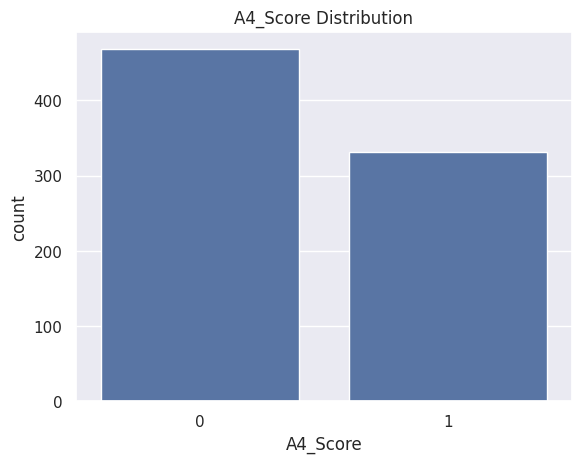

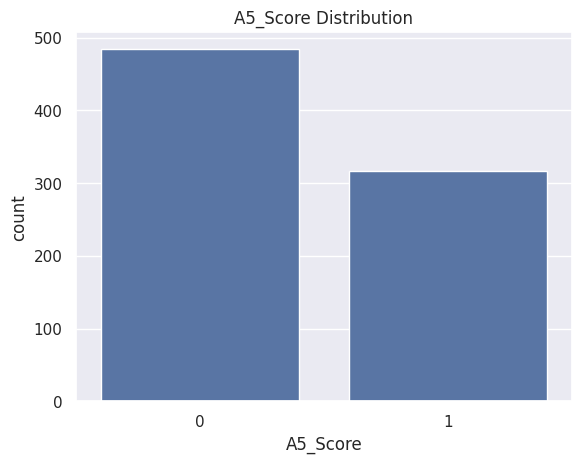

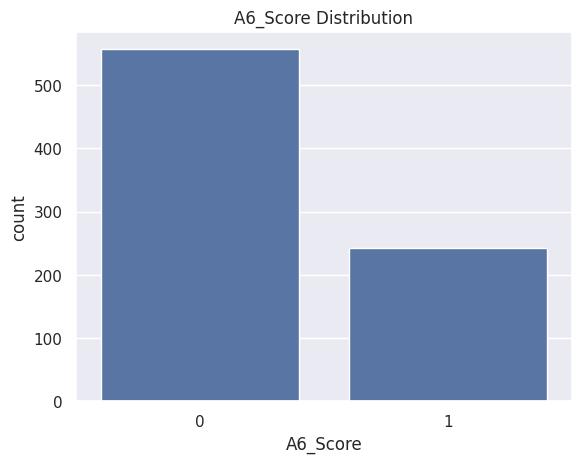

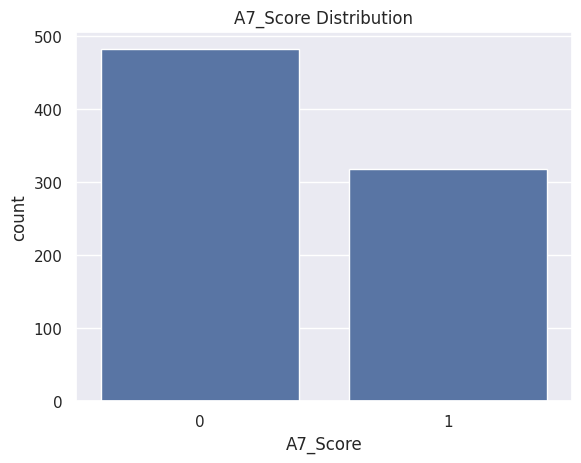

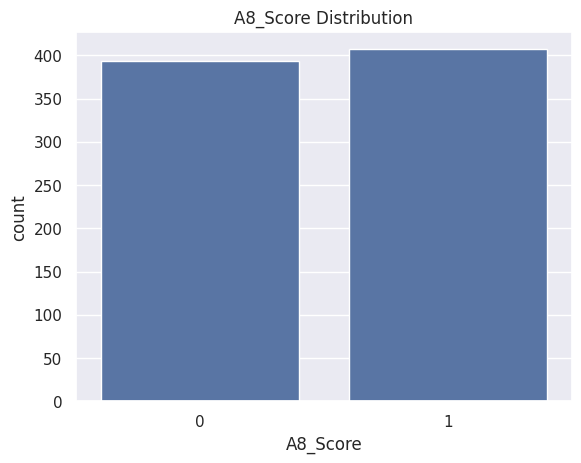

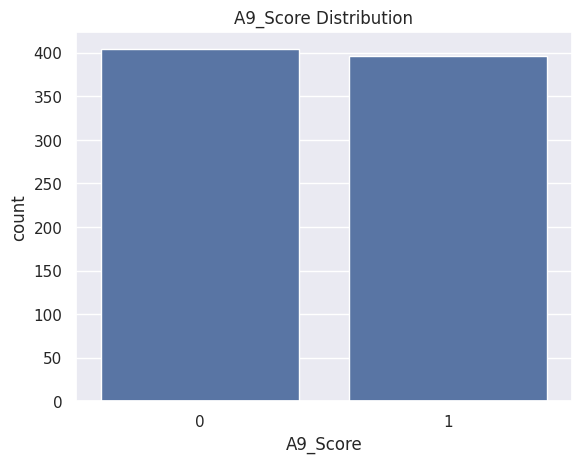

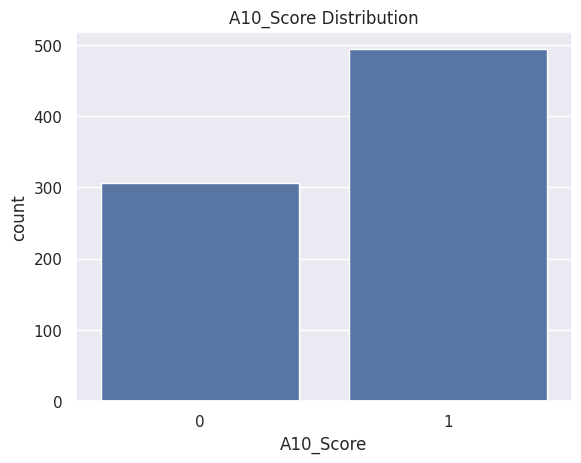

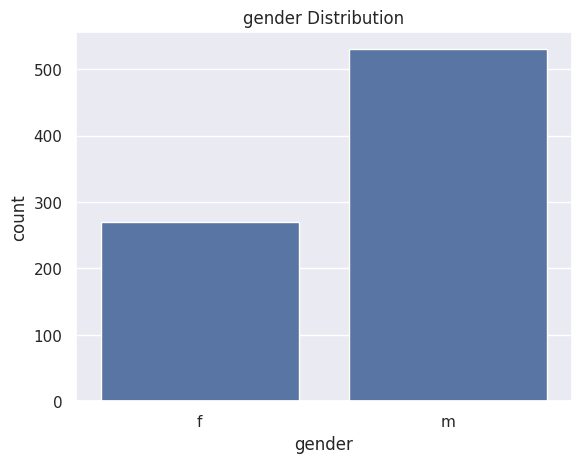

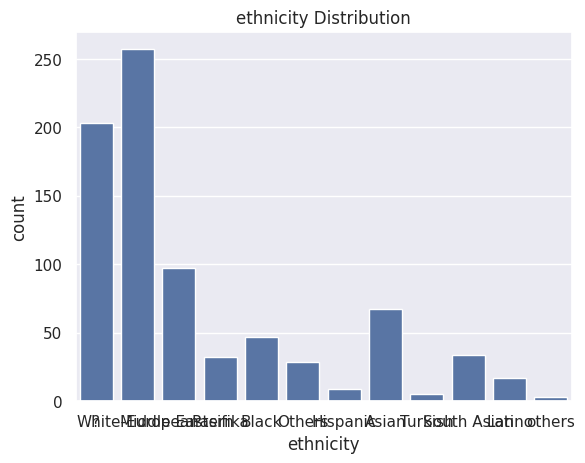

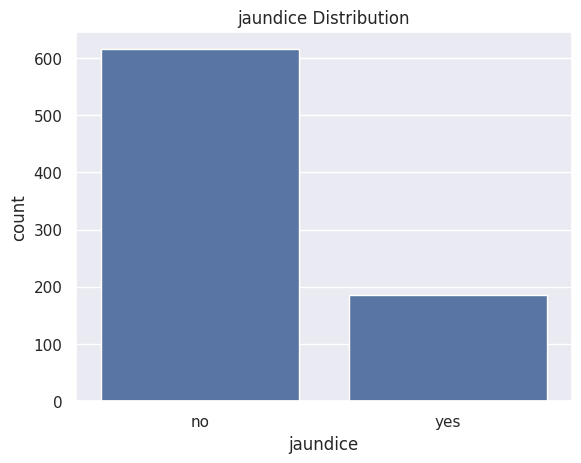

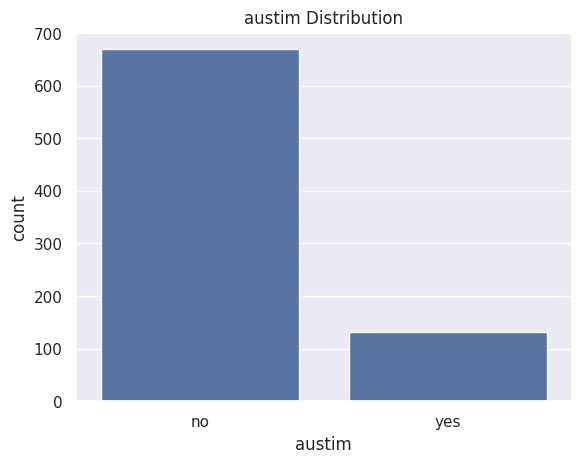

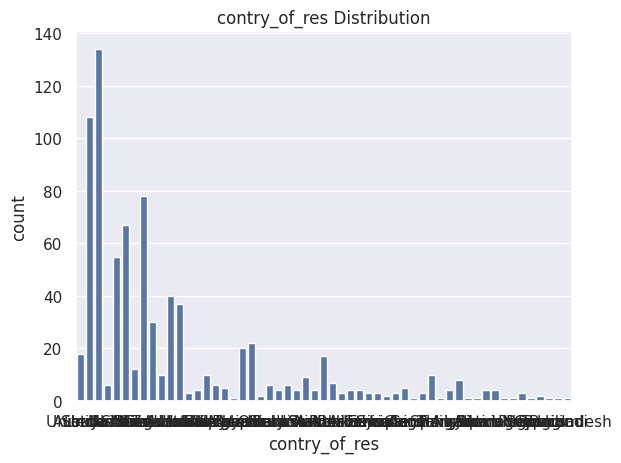

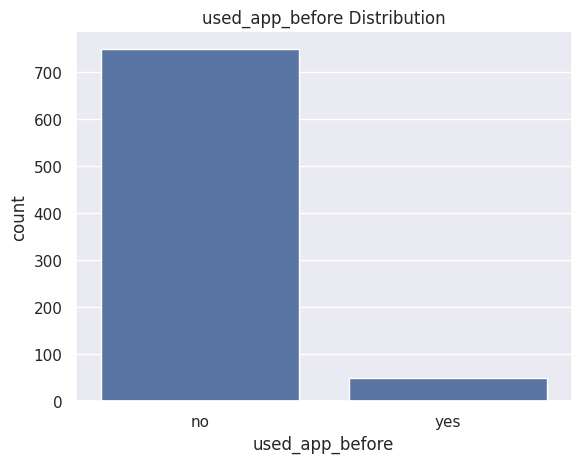

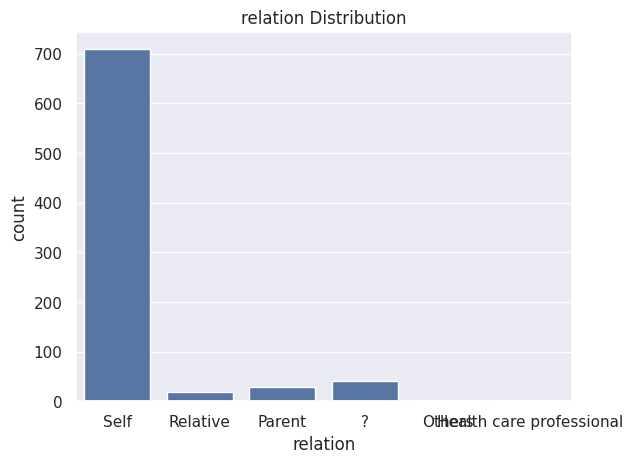

In [25]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f'{col} Distribution')
    plt.show()

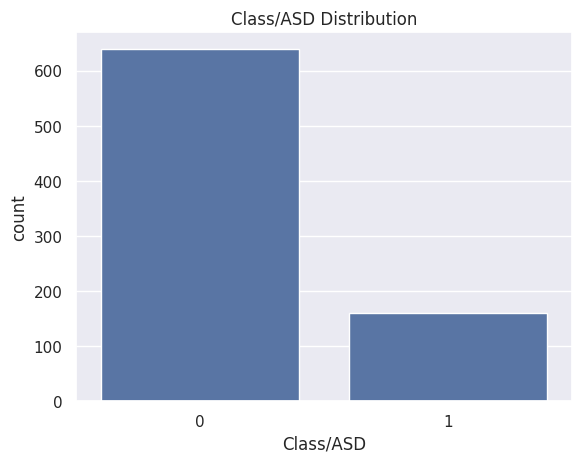

In [26]:
#countplot for target column class/asd
sns.countplot(x=df['Class/ASD'])
plt.title('Class/ASD Distribution')
plt.show()

In [27]:
df['ethnicity']= df['ethnicity'].replace({'?':'Others', 'others':'Others'})

In [28]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [29]:
df['relation']=df['relation'].replace(
    {'?':'Others',
     'Relative':'Others',
     'Parent':'Others',
     'Health care professional':'Others'}
)

In [30]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [31]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


Label Encoding

In [32]:
#identify columns with object datatype
object_columns = df.select_dtypes(include=['object']).columns

In [33]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [34]:
encoders = {}

#apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder #saving the encoder for this column

#save the encoders as a pickle file
with open('label_encoders.pkl', 'wb') as file:
  pickle.dump(encoders, file)

In [35]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [36]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,45,0,-4.777286,1,0


Bivariate Analysis

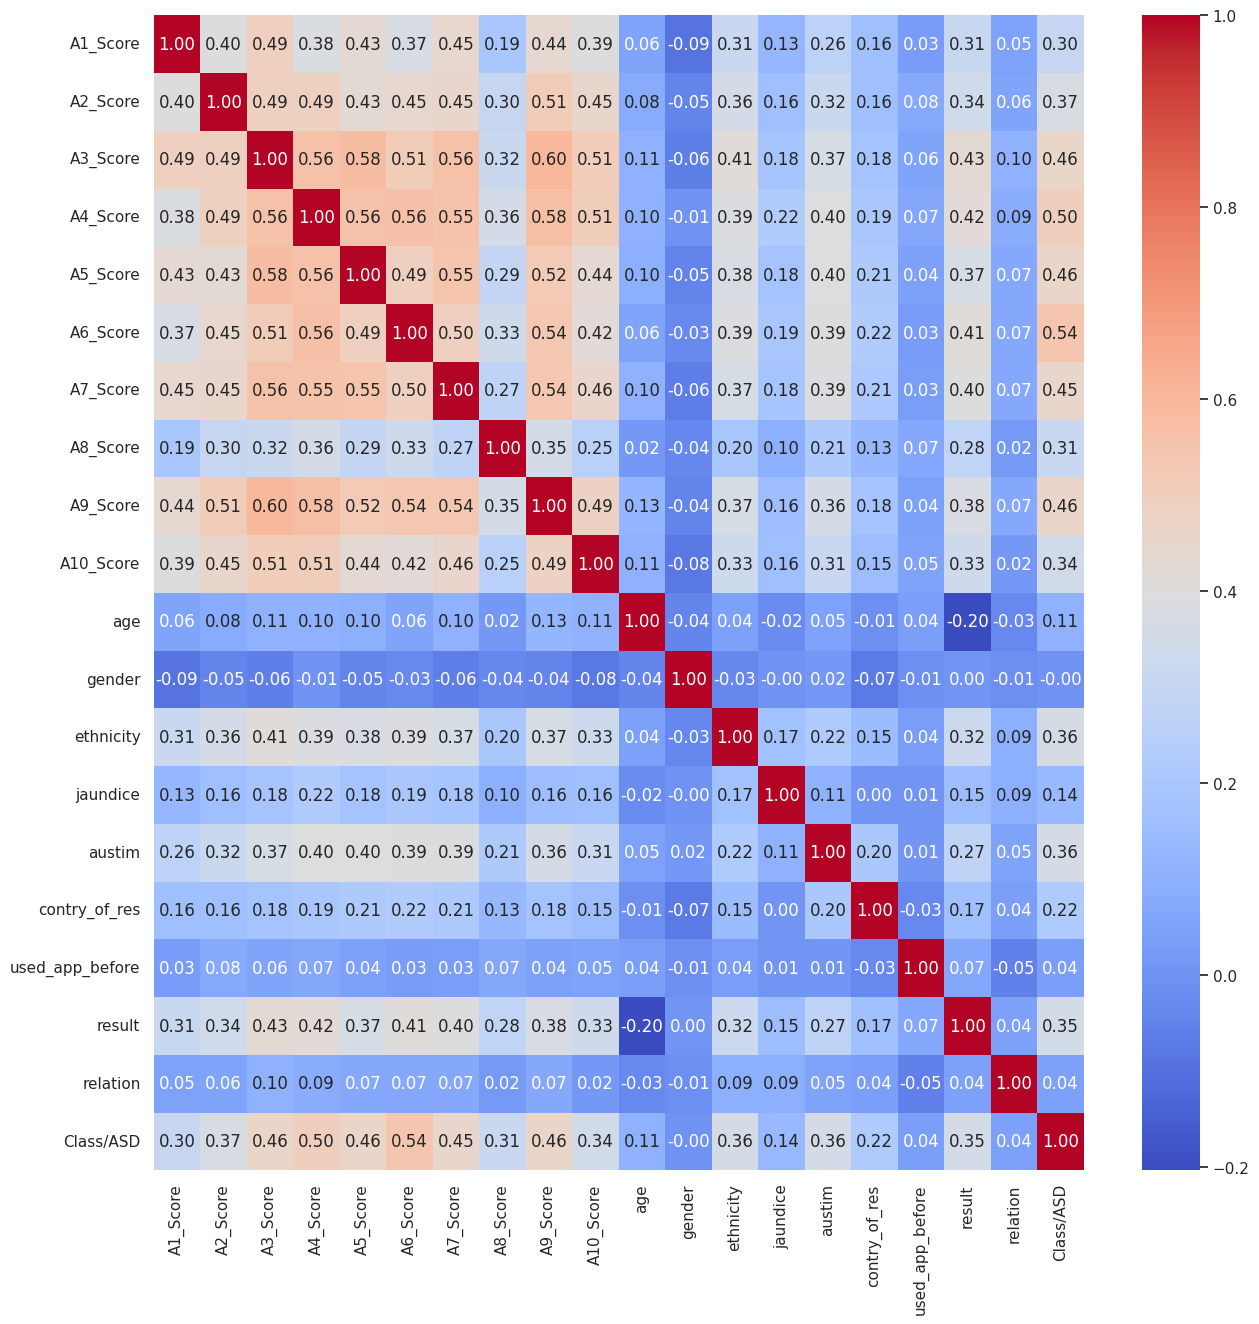

In [39]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

Insighs of EDA:
1. There are few outliers in the numerical columns (age, results)
2. There is a class imbalance in target column
3. There is a class imbalance in categorical columns
4. No highly correlated columns
5. Performed label encoding and saved the encoders


Data preprocessing

In [41]:
#handling the outliers
#function to replace the outliers with median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    #replace outliers with median values
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df

In [42]:
#replace outliers in the age column
df = replace_outliers_with_median(df, 'age')

#replace outliers in the result column
df = replace_outliers_with_median(df, 'result')

In [43]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,7,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1,0


Train Test Split

In [45]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [46]:
x = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

In [47]:
print(x)
print(y)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [49]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 19)
(160, 19)
(640,)
(160,)


In [50]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [51]:
y_test.value_counts()

,count
Class/ASD,
0,124
1,36


SMOTE

In [53]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [54]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(1030, 19)
(1030,)


In [55]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


Model Training

In [58]:
#list of classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [60]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}


In [61]:
#dictionary to store the cross val results
cv_scores = {}

#perform 5-fold corss val for each model
for model_name, model in models.items():
  print(f'training {model_name} with default parameters')
  cv_score = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring='accuracy')
  cv_scores[model_name] = cv_score
  print(f'{model_name} cross val accuracy: {np.mean(cv_score):.2f}')
  print('-'*50)

training Decision Tree with default parameters
Decision Tree cross val accuracy: 0.86
--------------------------------------------------
training Random Forest with default parameters
Random Forest cross val accuracy: 0.92
--------------------------------------------------
training XGBoost with default parameters
XGBoost cross val accuracy: 0.90
--------------------------------------------------


In [62]:
cv_scores

{'Decision Tree': array([0.80582524, 0.87378641, 0.87864078, 0.86893204, 0.88834951]),
 'Random Forest': array([0.92718447, 0.91747573, 0.91262136, 0.91262136, 0.91262136]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89805825, 0.90291262, 0.90776699])}

Model Selection and Hyperparameter Tuning

In [68]:
#initialse models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)

In [69]:
#hyperparameters grids
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30,50,70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1,2,4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100,200,500],
    'max_depth': [3,5,7,10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

In [71]:
#hyperparameter tuning for 3 tree based models

#below steps can be automated by using a for loop or by using a pipeline

#perform RandomizedSearchCv for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring='accuracy', random_state=42)

In [72]:
#fit the models
random_search_dt.fit(x_train_smote, y_train_smote)
random_search_rf.fit(x_train_smote, y_train_smote)
random_search_xgb.fit(x_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [78]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_score = random_search_dt.best_score_
    best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
    best_score = random_search_rf.best_score_
    best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
    best_score = random_search_xgb.best_score_
    best_model = random_search_xgb.best_estimator_

# Print results
print('Best parameters for Decision Tree:', random_search_dt.best_params_)
print('Best accuracy for Decision Tree:', random_search_dt.best_score_)

print('Best parameters for Random Forest:', random_search_rf.best_params_)
print('Best accuracy for Random Forest:', random_search_rf.best_score_)

print('Best parameters for XGBoost:', random_search_xgb.best_params_)
print('Best accuracy for XGBoost:', random_search_xgb.best_score_)

print("\nBest model overall:", type(best_model).__name__)
print("Best score overall:", best_score)


Best parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'entropy'}
Best accuracy for Decision Tree: 0.8679611650485437
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best accuracy for Random Forest: 0.925242718446602
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.5}
Best accuracy for XGBoost: 0.9097087378640776

Best model overall: RandomForestClassifier
Best score overall: 0.925242718446602


In [80]:
print(f'best model: {best_model}')
print(f'best cross-val accuracy: {best_score}')

best model: RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
best cross-val accuracy: 0.925242718446602


In [81]:
#save the best model
with open('best_model.pkl', 'wb') as file:
  pickle.dump(best_model, file)


Model Evaluation

In [82]:
#eval on test data
y_pred = best_model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8375
[[109  15]
 [ 11  25]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       124
           1       0.62      0.69      0.66        36

    accuracy                           0.84       160
   macro avg       0.77      0.79      0.78       160
weighted avg       0.84      0.84      0.84       160

